### 11. Container With Most Water

In [ ]:
class Solution:
    def area(self, i: int, j: int, height: List[int]) -> int:
        return min(height[i], height[j]) * (j - i)

    def maxArea(self, height: List[int]) -> int:
        res = 0
        left = 0
        right = len(height) - 1
        while(abs(left-right) > 1):
            ar = self.area(left, right, height)
            if ar > res:
                res = ar
            if height[left] <= height[right]:
                left += 1
            elif height[left] > height[right]:
                right -= 1
        ar = self.area(left, right, height)
        if ar > res:
            res = ar
        return res

- A hint I received on the page was *"Try to use two-pointers. Set one pointer to the left and one to the right of the array. Always move the pointer that points to the lower line."*
- The way it works is, `left` is an index to the leftmost element in `height` and `right` is an index to the rightmost element. We iterate through the elements in `height` until `left` and `right` are at a distance of 1 from each other.
- We calculate the area `ar` between `left` and `right` in each iteration, saving the state of the largest area in `res`.

### 15. 3Sum

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        s_nums = sorted(nums)

        for i, num in enumerate(s_nums):
            if i > 0 and s_nums[i-1] == s_nums[i]:
                continue
            left, right = i+1, len(s_nums)-1
            while left < right:
                s = num + s_nums[left] + s_nums[right]
                if s > 0:
                    right -= 1
                    continue
                elif s < 0:
                    left += 1
                    continue
                elif s == 0:
                    res.append([num, s_nums[left], s_nums[right]])
                    left += 1
                    while s_nums[left-1] == s_nums[left] and left < right:
                        left += 1
        return res

- The way it works is that we first sort `nums` and save it in `s_nums`, then we iterate through `s_nums`, skipping duplicate elements, and for each number we find the matching two sums in the remainder of `s_nums` to the right.
- The two sums in the remaining list can be found by placing a pointer `left` on the leftmost element and a pointer `right` on the rightmost element, and moving the pointers closer together until all matching two sums have been found.
- More specifically, when the current sum `s` is greater than `0`, we move the `right` pointer inward, and when `s` is less than `0`, we move the `left` pointer inward.

### 42. Trapping Rain Water

In [ ]:
class Solution:
    def validate(self, block: int ,height: List[int]) -> tuple[bool, int]:
        remainder = height[block+2:len(height)]
        if remainder == []:
            return False, 0
        if height[block] > height[block+1] and height[block+1] < max(remainder):
            #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => detected pool')
            return True, max(remainder)
        #print(f'{height[block]} > {height[block+1]} and {height[block+1]} < {max(remainder)} => continue')
        return False, 0

    def trap(self, height: List[int]) -> int:
        left,right = 0,1
        res = 0
        
        while left < len(height):
            #print(f'left: {left} right: {right}')
            loop, highest = self.validate(left, height)
            if loop:
                #print(f'pool height: {min(highest, height[left])}')
                while height[right] < min(highest, height[left]):
                    res += min(highest, height[left]) - height[right]
                    #print(f'res = {min(highest, height[left])} - {height[right]} = {res}')
                    right += 1
                left = right
                right += 1
            else:
                left += 1
                right += 1
        return res

- We iterate over `height` with two pointers `left` and `right`, starting on the first and second element respectively.
- I had to write a helper function, `validate`, that will check two conditions to decide whether an element in the iteration should be skipped or not. If an element is skipped, `left` and `right` move one position further to the right.
- The first condition is that the height of `left` is greater than the height of `right`.
- The second condition is that the largest value `highest` in the remaining list to the right of `right`, called `remainder`, is greater than the height of `right`.
- In the inner loop, we iterate over the *"pool"*, which has a height of the minimum of `highest`, and the height of `left`, and add the amount of *"water"* contained in the *"pool"* to `res`.

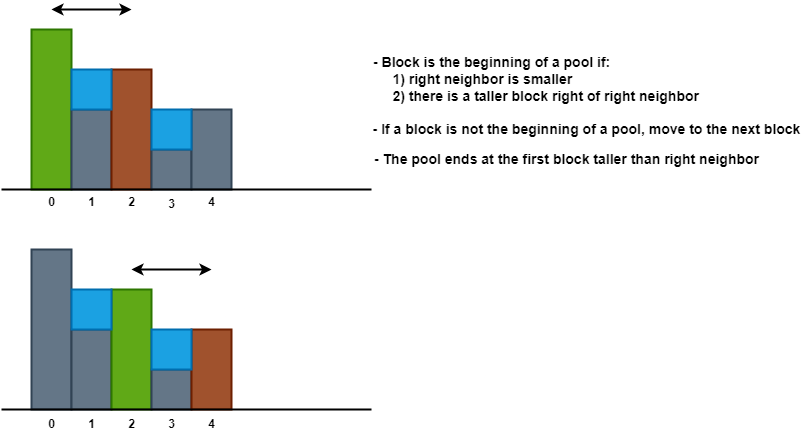

### 125. Valid Palindrome

In [ ]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        s = re.sub(r'\W', '', s)
        s = s.lower()
        s = s.replace('_', '')
        if s == '':
            return True
        print(s)
        half = int(len(s) / 2)
        print(f'len {len(s)} half {half}')
        for i in range(half):
            print(f'comparing {s[i]} : {s[len(s) - 1 - i]}')
            if s[i] != s[len(s) - 1 - i]:
                return False
        return True

- As the description of this task mentions, *"A String is a palindrome when its reduction to alphanumeric and lowercase letters, reads the same forward and backward"*.
- To this end, I have used a regular expression and the `lower()` method to convert `s` into the desired format.
- Lastly, I iterated through `half` the length of `s`, starting with one pointer at the end of `s` and another pointer at the start of `s`, and compared their characters.

### 167. Two Sum II - Input Array Is Sorted

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        for i, num in enumerate(numbers):
            if i < len(numbers) - 2 and num == numbers[i+2]:  
                continue
            for j in range(i+1, len(numbers)):
                if num + numbers[j] == target:
                    print(f'target reached with {i}, {j}')
                    return [i+1,j+1]
                elif num + numbers[j] > target:
                    break

- The way I approached this problem, was to iterate through every `num` in `numbers`, and for every `num`, to iterate over all subsequent numbers, until either the target is reached, or the sum is greater than the `target`.
- To avoid unnecessary calculations of sums, the inner loop breaks as soon as the sum is greater than `target`.
- I had to add another conditional check at the start of the outer loop, to further increase performance for large inputs.
- The first check will ensure that we avoid entering the inner loop, as long as there are more than two subsequent numbers with the same value.
- Both breaking out of the loop and the first conditional only work because the list is sorted.

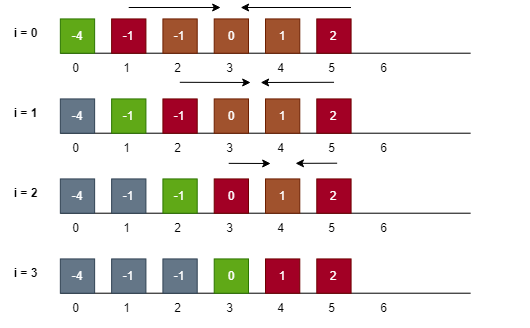